# 02456 Deep Learning Exercise 1 Pen and Paper

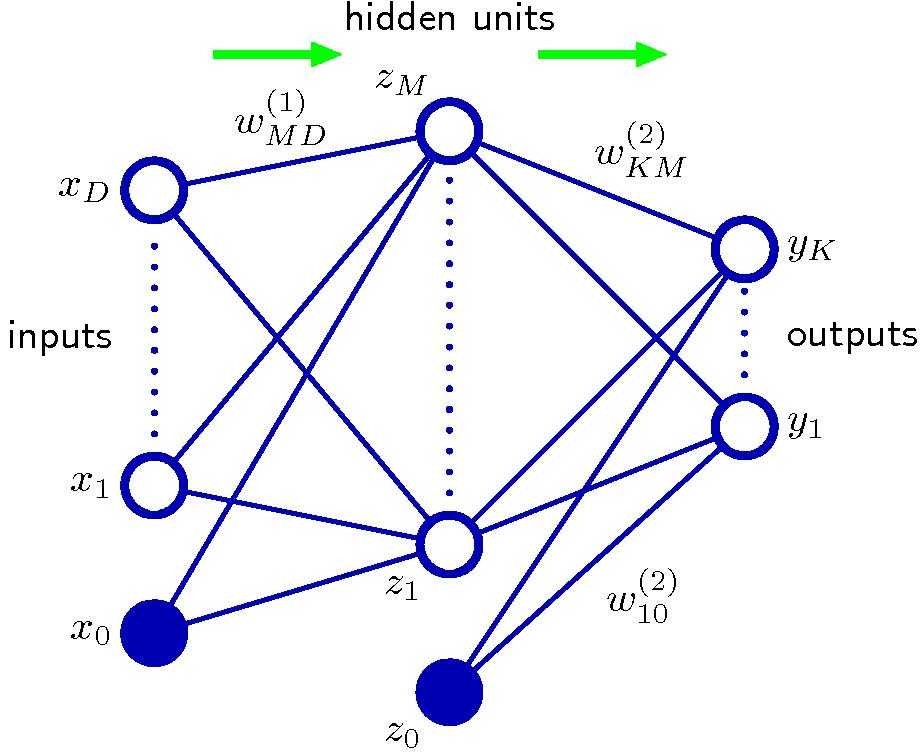

In [ ]:
# Figure 5.1 from Bishop

from IPython.display import Image
Image("figures/Figure5.1.jpg",width=500)

## Exercise a)

**a) Write $y_j$ directly as a function of $x$. That is, eliminate the $a$s and $z$s:**

$$
y_j = h_2(\sum_{m=0}^{M}w_{jm}^{(2)} h_1(\sum_{i=0}^Dw_{mi}^{(1)}x_i))
$$

## Exercise b)

**b) Write the equation for a neural network with two hidden layers and three layers of weights $w=w^{(1)},w^{(2)},w^{(3)}$. Again, without using $a$s and $z$s.**
$$
y_j = h_3(\sum_{k=0}^K w_{jk}^{(3)} h_2(\sum_{m=0}^M w_{km}^{(2)} h_1(\sum_{i=0}^D w_{mi}^{(1)}x_i)))
$$

## Exercise c)

**c) Write the equations for an FFNN with $L$ layers as recursion. Use $l$ as the index for the layer:**
$$
\begin{align}
y_j & = z_j^{(l)} & \\
z^{(l)}_j & = h_l(a_j^{(l)}) & l=1,\ldots,L \\
a^{(l)}_j & = \sum_{i} w_{ji}^{l}z_i^{(l-1)} &  l=2,\ldots,L \\
a^{(1)}_j & = \sum_{i=0}^D w_{ji}^{(1)}x_i& 
\end{align}
$$

## Exercise d) optional

Optional exercises do not give extra credits but are included to give you an opportunity to dive a bit deeper. You can omit them for the first run through the lab and then return to them later on when the other exercises are completed.

d) Do we really need the non-linearities? Show that if we remove the non-linear functions $h_l$ from the expressions above then the output becomes linear in $x$. This means that the model collapses back to the linear model and therefore cannot learn non-linear relations between $x$ and $y$.

# Loss functions and maximum likelihood

Assumptions used in the exercises below:

1. Unless we are working with series data - such as time series - we will assume that each data point is independently sampled and each data point is sampled from the same distribution (also known as iid = Independent and identically distributed):
$$
p(\mathbf{t}_1,\ldots,\mathbf{t}_N|\mathbf{x}_1,\ldots,\mathbf{x}_N,w) =
\prod_{n=1}^N p(\mathbf{t}_n|\mathbf{x}_n,w) \ .
$$
2. To connect with the sum of squares loss we will assume that the target can be written as the model output plus some random error $\mathbf{\epsilon}$ and that $\mathbf{\epsilon}$ has a Gaussian distribution with zero mean and covariance $\sigma^2 \mathbf{I}$. This means that targets themselves are Gaussian distributed with mean $\mathbf{y}(\mathbf{x})$ and covariance $\sigma^2 \mathbf{I}$, where $\mathbf{I}$ is the identity matrix. Denoting the Gaussian distribution by $\mathcal{N}$ we can write this as:
$$
p(\mathbf{t}_n|\mathbf{x}_n,w) = \mathcal{N}(\mathbf{t}_n|\mathbf{y}(\mathbf{x}_n),\sigma^2 \mathbf{I}) \ . 
$$

## Exercise e)

**e) In this exercise you will show that with the two above assumptions we can derive a loss function that contains $E(w)$ as a term. Two hints**

**1. With the used covariance we can write the Gaussian distribution as**
$$
\mathcal{N}(\mathbf{t}_n|\mathbf{y}(\mathbf{x}_n),\sigma^2 \mathbf{I}) = \frac{1}{\sqrt{2\pi \sigma^2}^D}
\exp ( - || \mathbf{y}(\mathbf{x}_n) - \mathbf{t}_n||_2^2 /2\sigma^2 )
$$
**2. In order to turn maximum likelihood into a loss/error function apply the (natural) logarithm to the likelihood objective and multiply by minus one.**

**Show that the loss we get is**
$$
\frac{ND}{2} \log 2\pi \sigma^2 + \frac{1}{2\sigma^2} E(w) \ . 
$$
**Further argue why applying the log and multiplying by minus one is the right thing to do in order to get a loss function. *Hint:* Will the optimum of the likelihood function change if we apply the logarithm?**

Taking the log of the likelihood will not change it's optimum. Log-transformation simply change the scale and convert the calculated likelihood, $\mathcal{L}$ ,from being $0\ge \mathcal{L} \ge 1$ to being a number on from $-\infty$ to 0. By additionally multiplying the log-likelihood with (-1), we get a number from 0 to $\infty$, and thus we can determine the maximum likelihood by using minimization algorithms on the negative log-likelihood.

\begin{align}
p(t_1,...,t_n\vert x_1,...,x_n,w)&=\prod_{n=1}^N p(\mathbf{t}_n|\mathbf{x}_n,w)
\end{align}
Through the assumption of a Gaussian distribution of the errors (and thus also the targets themselves) we get:

\begin{align}
p(t_1,...,t_n\vert x_1,...,x_n,w)= \prod_{n=1}^N \mathcal{N} (t_n\vert y(x_n),\sigma^2I)  &=\prod_{n=1}^N \dfrac{1}{\sqrt{2\pi \sigma^2}^D}
e^{( - || \mathbf{y}(\mathbf{x}_n) - \mathbf{t}_n||_2^2 /2\sigma^2 )} \\
\ln (p(t_1,...,t_n\vert x_1,...,x_n,w))&=\ln \left(\prod_{n=1}^N \dfrac{1}{\sqrt{2\pi \sigma^2}^D}
e^{( - || \mathbf{y}(\mathbf{x}_n) - \mathbf{t}_n||_2^2 /2\sigma^2 )}\right) \\
&=\sum_{n=1}^N \ln \left(\dfrac{1}{\sqrt{2\pi \sigma^2}^D}
e^{( - || \mathbf{y}(\mathbf{x}_n) - \mathbf{t}_n||_2^2 /2\sigma^2 )}\right) \\ 
&=\sum_{n=1}^N \left(\ln \left(\dfrac{1}{\sqrt{2\pi \sigma^2}^D}\right) - \dfrac{1}{2\sigma^2} \vert\vert {y(x_n)-t_n}\vert\vert_2^2\right) \\
&=\sum_{n=1}^N \ln \left(\dfrac{1}{\sqrt{2\pi \sigma^2}^D}\right) - \dfrac{1}{2\sigma^2} \sum_{n=1}^N \vert\vert {y(x_n)-t_n}\vert\vert_2^2 \\
\text{Insert $E(w)=\sum_{n=1}^N \vert \vert y(x_n)-t_n \vert \vert ^2_2$} \\
&= \sum_{n=1}^N -D\: \ln (\sqrt{2\pi \sigma^2}) - \dfrac{1}{2\sigma^2} E(w) \\
&= \sum_{n=1}^N -\dfrac{D}{2}\: ln(2\pi \sigma^2) - \dfrac{1}{2\sigma^2} E(w) \\
&=  -\dfrac{ND}{2}\: \ln (2\pi \sigma^2) - \dfrac{1}{2\sigma^2} E(w) \\
\text{Multiply by (-1) and arrive at the final expression for the negative log-likelihood:} \\
&=  \dfrac{ND}{2}\: \ln (2\pi \sigma^2) + \dfrac{1}{2\sigma^2} E(w) \\
\end{align}


## Exercise f) optional

f) Show that the optimum (= minimum of the loss) with respect to $w$ is not affected by the value of $\sigma^2$. Find the optimum for $\sigma^2$ as a function of $w$. 

This means that for the problem of finding $w$, sum of squares and maximum likelihood for the Gaussian likelihood with $\sigma^2 \mathbf{I}$ covariance are equivalant.  

## Classification, one-hot and softmax

We will now turn to classification. In classication the $K$-dimensional target vector $\mathbf{t}$ encodes exactly one out of $K$ possible classes. It is convenient to use the so-called one-hot encoding for this meaning that the $\mathbf{t}$ vector will have $K-1$ zeros and a single one at position $k$ if the target for the data point is class $k$. For example, if we have $K=4$ and the correct label is class three then $\mathbf{t}=(0,0,1,0)$.

We need to modify the network output $\mathbf{y}(\mathbf{x})$ in order to get a likelihood function. In the example above the likelihood should be the probability that the model assigns to class three. This means that the output should be probabilities. We can achieve this with the softmax function:
$$
y_k = \frac{\exp ( a_k )}{\sum_j \exp ( a_j )} \ ,
$$
where $a_j$ is shorthand for the linear output from the last layer: $a^{(L)}_j$. The $a$ vector is what in statistics is called the multinomial link function and they are also called the logits. Combining the one-hot encoding of the target with the probabilistic model outputs we can write:
$$
p(\mathbf{t}_n|\mathbf{x}_n,w) = \prod_{k=1}^K \left[ y_k(\mathbf{x}_n)\right]^{t_{nk}} \ .
$$
We can now see that the one-hot encoding selects exactly the right output term and the other terms with $t_{nj}=0$ with contribute ones because $[y_{nj}]^0=1$.

## Exercise g) 

**g) Show using the same procedure we used for regression that the loss function for classification is:**
$$
E(w) = - \sum_{n=1}^N \sum_{k=1}^K t_{nk} \log y_{k}(\mathbf{x}_n) \ .
$$
**This is also known as the cross entropy loss.**

From above descriptions I have the following two expressions:
$$
p(\mathbf{t}_1,\ldots,\mathbf{t}_N|\mathbf{x}_1,\ldots,\mathbf{x}_N,w) =
\prod_{n=1}^N p(\mathbf{t}_n|\mathbf{x}_n,w) \ .
$$

$$
p(\mathbf{t}_n|\mathbf{x}_n,w) = \prod_{k=1}^K \left[y_k(\mathbf{x}_n)\right]^{t_{nk}} \ .
$$
Thus, I can begin deriving the negative log-likelihood loss function for classification:

\begin{align}
p(\mathbf{t}_1,\ldots,\mathbf{t}_N|\mathbf{x}_1,\ldots,\mathbf{x}_N,w) &= \prod_{n=1}^N \prod_{k=1}^K \left[y_k(\mathbf{x}_n) \right]^{t_{nk}} \\
-\ln (p(\mathbf{t}_1,\ldots,\mathbf{t}_N|\mathbf{x}_1,\ldots,\mathbf{x}_N,w)) &= \ln \left(\prod_{n=1}^N \prod_{k=1}^K \left[y_k(\mathbf{x}_n) \right]^{t_{nk}}\right) \hspace{25pt} \text{insert $y_k(x_n) = \frac{e^{a_k}}{\sum_j e^{a_j}}$} \\
&= -\ln \left(\prod_{n=1}^N \prod_{k=1}^K \left(\frac{e^{a_k}}{\sum_j e^{a_j}}\right)^{t_{nk}} \right) \\
&= -\sum_{n=1}^N \sum_{k=1}^K \ln \left(\left(\frac{e^{a_k}}{\sum_j e^{a_j}}\right)^{t_{nk}} \right) \\
&= -\sum_{n=1}^N \sum_{k=1}^K t_{nk} \ln \left(\frac{e^{a_k}}{\sum_j e^{a_j}} \right) \\
&= -\sum_{n=1}^N \sum_{k=1}^K t_{nk} \ln (y_k(\mathbf{x}_n)) = E(w)
\end{align}


# Stochastic gradient descent

To paraphrase Stan Lee: With great flexibility comes complicated fitting to data! We therefore have to resort to general purpose optimization. Optimization refers to the process of searching for a set of weights $w$ that achieves some good results, such as a low loss on the training set. The loss function is differentiable so we can use gradient information to guide our search. In deep learning some variant of stochastic gradient descent is almost always used for optimization when the gradients can be computed. Stochastic here means that the gradient is computed on a subset of the training set.

Basic gradient descent means that we take a step with step-size $\eta$ opposite the parameter gradient direction:
$$
w^{\mathrm{new}} = w - \eta \nabla E(w) \ , 
$$
where $\nabla$ is the parameter gradient operator. Applying $\nabla$ to a scalar function like $E(w)$ will produce a vector as output where the $j$th component of the vector is the derivative of $E(w)$ with respect to the $j$th parameter. A conceptional sketch of the optimization problem is given in the figure below.  

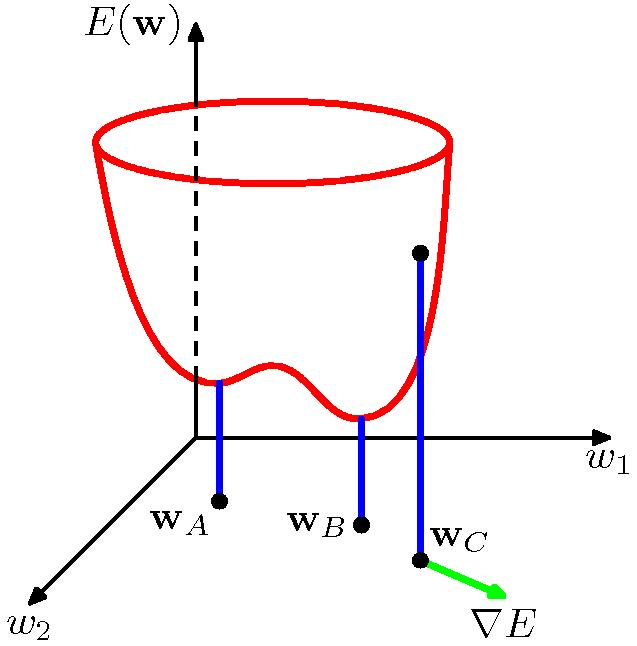

In [ ]:
# Bishop figure 5.5 

Image("figures/Figure5.5.jpg",width=500)

## Exercise h) optional
Prove that the gradient calculated on a random subset of the training set on average is proportional to the true gradient. 

# Error backpropagation
So-called error backpropagation is simply a recipe for calculating gradients of layered models such as neural networks. Efficient computation is based upon 1) the [chain-rule of differentiation](https://en.wikipedia.org/wiki/Chain_rule):
$$
\frac{\partial f(g(w))}{\partial w} = \left. \frac{\partial f(g)}{\partial g} \right|_{g=g(w)} \frac{\partial g(w)}{\partial w}
$$
and 2) storing intermediate computations. In the following we will omit writing $g=g(w)$ and instead let it be understood from the context.

## Gradient for layer $L$

We return to the FFNN with $L$ layers. We start by computing the gradient with respect to a weight in the last layer:
$$
\frac{\partial E(w)}{\partial w^{(L)}_{ji}} \ .
$$
To make life a bit simpler for ourselves we will assume that our training set consists of one example so we can drop the training point index $n$. (As an optional exercise below you can put the summation over the training examples back in.)

First we observe the $w$ dependence in $E(w)$ is through $a^{(L)}_1,\ldots,a^{(L)}_K$ so we can now apply the chain-rule
$$
\frac{\partial E(w)}{\partial w^{(L)}_{ji}} = \sum_{k=1}^K \frac{\partial E(w)}{\partial a^{(L)}_{k}} \frac{\partial a^{(L)}_{k}}{\partial w^{(L)}_{ji}} \ .
$$
We can use that $a^{(L)}_{k} = \sum_i w^{(L)}_{ki} z^{(L-1)}_i$ to conclude that $\frac{\partial a^{(L)}_{k}}{\partial w^{(L)}_{ji}} = z^{(L-1)}_i$ when $j=k$ and zero otherwise. So we can write 
$$
\frac{\partial E(w)}{\partial w^{(L)}_{ji}} = \delta^{(L)}_j  z^{(L-1)}_i \ ,
$$
where we with foresight have defined 
$$
\delta^{(L)}_j = \frac{\partial E(w)}{\partial a^{(L)}_{j}} \ .
$$
These $\delta$s will become very practical for bookkeeping purposes. 

## Exercise i)

**Calculate**
$$
\delta^{(L)}_j = \frac{\partial E(w)}{\partial a^{(L)}_{j}}
$$

<span style="color:red">
**1) Show** $E(w) = - \sum_{k=1}^K t_k a^{(L)}_{k} + \log \sum_{k=1}^K \exp( a^{(L)}_{k} )$.

(Training set is assumed to be of size one. Thus, N = 1 in the E(w) for classification, and the summation over the number of samples ($\sum_{n=1}^N$) can be removed.)

\begin{align}
E(w) &= -\sum_{n=1}^N \sum_{k=1}^K t_{nk} \ln (y_k(\mathbf{x}_n)) \hspace{60pt} \text{Insert $y_k = \dfrac{e^{a^{(L)}_k}}{\sum_j e^{a^{(L)}_j}}$} \\
&= - \sum_{k=1}^K t_{nk} \ln \left(\dfrac{e^{a^{(L)}_k}}{\sum_j e^{a^{(L)}_j}}\right) \\
&= - \sum_{k=1}^K t_{nk} \ln (e^{a^{(L)}_k}) + t_{nk}\ln(\sum_j e^{a^{(L)}_j}) \hspace{20pt}\text{Insert $\sum_j = \sum_{k=1}^K$ (We are only considering the output layer}) \\
&= - \sum_{k=1}^K t_{nk} \ln (e^{a^{(L)}_k}) + t_{nk}\ln(\sum_{k=1}^K e^{a^{(L)}_k}) \\
\end{align}
    
</span>

**2) Show** $\frac{\partial}{\partial a^{(L)}_{j}} \log \sum_{k=1}^K \exp( a^{(L)}_{k} ) = y_j$.
\begin{align}
    &\frac{\partial}{\partial a^{(L)}_{j}} \log \sum_{k=1}^K \exp( a^{(L)}_{k})
\end{align}
It's evident that the expression is 0 for all $j\ne k$. Only consider the case where j = k and use the chain rule*
\begin{align}
    \frac{\partial}{\partial a^{(L)}_{j}} \log \sum_{k=1}^K \exp( a^{(L)}_{k}) &= \dfrac{1}{\sum_j e^{a_j^{(L)}}} \cdot \dfrac{\partial}{\partial a^{(L)}_j}\sum_{k=1}^K e^{a^{(L)}_k} \\
    &= \dfrac{1}{\sum_j e^{a_j^{(L)}}} \cdot e^{a^{(L)}_j} \\
    &= y_j
\end{align}
    
Finally, it can be seen that $-\dfrac{\partial}{\partial a_j^{(L)}} \sum_{k=1}^K t_k a_k^{(L)} = 0$ for all $j \ne k$, and the results can be combined into the final expression for $\delta^{(L)}_j$ for j = k:
\begin{align}
\delta^{(L)}_j &= -\dfrac{\partial}{\partial a_j^{(L)}} \sum_{k=1}^K t_k a_k^{(L)} + y_j \\
&= -t_j + y_j
\end{align}
    


## Gradient for layer $L-1$

**Now we proceed to the second last layer**
$$
\frac{\partial E(w)}{\partial w^{(L-1)}_{ji}} \ .
$$
**This will allow us to identify a pattern that will enable us to generalize to any layer.**

**We now use that the model is layered so the chain-rule we need is:
$$
\frac{\partial E(w)}{\partial w^{(L-1)}_{ji}} = \sum_{k=1}^K \frac{\partial E(w)}{\partial a^{(L)}_{k}} \frac{\partial a^{(L)}_{k}}{\partial a^{(L-1)}_{j}} \frac{\partial a^{(L-1)}_{j}}{\partial w^{(L-1)}_{ji}} \ .
$$
We can now again use $a^{(L)}_{k} = \sum_i w^{(L)}_{ki} z^{(L-1)}_i= \sum_i w^{(L)}_{ki} h_{L-1}(a^{(L-1)}_i)$ and the definition of $\delta^{(L)}_j$: 
$$
\frac{\partial E(w)}{\partial w^{(L-1)}_{ji}} = \sum_{k=1}^K \delta^{(L)}_k  w^{(L)}_{kj} h_{L-1}'(a^{(L-1)}_j) z^{(L-2)}_i \ .
$$
We can now define
$$
\delta^{(L-1)}_j = \sum_{k=1}^K \delta^{(L)}_k  w^{(L)}_{kj} h_{L-1}'(a^{(L-1)}_j) \ .
$$
To write the gradient in the same way as for layer $L$
$$
\frac{\partial E(w)}{\partial w^{(L-1)}_{ji}} = \delta^{(L-1)}_j \ z^{(L-2)}_i \ . 
$$
If we look a bit closer at the definition of $\delta^{(L-1)}_j$ we see it is actually nothing but: 
$$
\delta^{(L-1)}_j = \frac{\partial E(w)}{\partial a^{(L-1)}_{j}} \ .
$$
You will use this in the next exercise to derive the backpropagation rule for a general layer $l<L$.**

## Exercise j) - the backpropagation rule for layer $l<L$

**j) Use the above results to argue why the general backpropagation rule for $l<L$ is written as:**
$$
\begin{align}
\frac{\partial E(w)}{\partial w^{(l)}_{ji}} & = \delta^{(l)}_j  z^{(l-1)}_i \\
\delta^{(l)}_j & = \sum_{k=1}^K \delta^{(l+1)}_k  w^{(l+1)}_{kj} h_{l}'(a^{(l)}_j) 
\end{align}
$$

A neural network generally consist of an input, hidden layer(s) and an output layer. These three categories serve different purposes, which is also reflected in their mathematical structure. Thus, all the hidden layers (all layers with l < L) share the same general pattern in the expression for their gradient. By finding an expression for L-1, one would automatically also have prototype of the general expression for all l < L (as seen above).

## Exercise k) - optional
k) Derive the backpropagation rule for regression. That is perform the calculation in exercise i) for the regression loss. Everything else stays the same. Actually it turns out that is you use $h_L(a) = a$ then you even get the same result as in i).

## Exercise l)
l) Modify the backpropagation rules to be able to take a dataset of size greater than one. 
Hint: This only requires introducing a sum over $n$ and $n$ indices in a few places.